In [60]:
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib
%matplotlib inline
font = {        'size'   : 16}
matplotlib.rc('font', **font)

In [45]:
# Read all the files
dfConfirmedGlobal = pd.read_csv(r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dfDeathsGlobal = pd.read_csv(r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

baseURLFormat = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{}.csv'
filePaths = [baseURLFormat.format(d.strftime('%m-%d-%Y')) for d in pd.date_range('2020-03-23', pd.to_datetime('today')).tolist()]

df_from_each_file = []
for f in filePaths:
    try:        
        df_from_each_file.append(pd.read_csv(f))
    except:
        break
dfByDay = pd.concat(df_from_each_file, ignore_index=True)

dfConfirmedUS = pd.read_csv(r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/archived_data/archived_time_series/time_series_19-covid-Confirmed_archived_0325.csv')
dfConfirmedUS = dfConfirmedUS[dfConfirmedUS.columns[:-1]]
dfDeathsUS = pd.read_csv(r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/archived_data/archived_time_series/time_series_19-covid-Deaths_archived_0325.csv')
dfDeathsUS = dfDeathsUS[dfDeathsUS.columns[:-1]]

# Get US data only
dfConfirmedUS = dfConfirmedUS [(dfConfirmedUS['Country/Region'] == 'US') & (dfConfirmedUS['Province/State'] != 'US')]
dfDeathsUS = dfDeathsUS [(dfDeathsUS['Country/Region'] == 'US') & (dfDeathsUS['Province/State'] != 'US')]

# Merge columns after 3/23 when the timeseries broke
dfByDayState = dfByDay[dfByDay.Country_Region == 'US'].groupby(['Last_Update', 'Province_State']).agg({'Confirmed':sum, 'Deaths':sum}).unstack(level=0)
dfByDayStateConfirmed = dfByDayState[['Confirmed']]
dfByDayStateConfirmed.columns = dfByDayStateConfirmed.columns.droplevel().map(lambda x: pd.to_datetime(x).strftime('%m/%d/%y'))

dfConfirmedUSStates = dfConfirmedUS.merge(dfByDayStateConfirmed, how='left', left_on='Province/State', right_on='Province_State')
dfConfirmedUSStates[dfConfirmedUSStates.columns[4:]] = dfConfirmedUSStates[dfConfirmedUSStates.columns[4:]].fillna(0).astype(np.int64)
dfConfirmedUSStates = dfConfirmedUSStates.sort_values(dfConfirmedUSStates.columns[-1], ascending = False)

dfByDayStateDeaths = dfByDayState[['Deaths']]
dfByDayStateDeaths.columns = dfByDayStateDeaths.columns.droplevel().map(lambda x: pd.to_datetime(x).strftime('%m/%d/%y'))
dfDeathsUSStates = dfDeathsUS.merge(dfByDayStateDeaths, how='left', left_on='Province/State', right_on='Province_State')
dfDeathsUSStates[dfDeathsUSStates.columns[4:]] = dfDeathsUSStates[dfDeathsUSStates.columns[4:]].fillna(0).astype(np.int64)
dfDeathsUSStates = dfDeathsUSStates.sort_values(dfDeathsUSStates.columns[-1], ascending = False)

# Use dfConfirmedUSStates and dfDeathsUSStates

In [46]:
tab_confirmed = dfConfirmedUSStates
tab_deaths = dfDeathsUSStates

# tab_confirmed = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
# tab_deaths = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
# tab_recovered = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [47]:
tab_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,03/23/20,03/24/20,03/25/20,03/26/20
1,New York,US,42.1657,-74.9481,0,0,0,0,0,0,...,1706,2495,5365,8310,11710,15793,20884,25681,30841,37877
9,New Jersey,US,40.2989,-74.5210,0,0,0,0,0,0,...,267,267,742,890,1327,1914,2844,3675,4402,6876
2,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,698,751,952,1177,1364,1642,2108,2538,2998,3899
0,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,...,1076,1014,1376,1524,1793,1996,2221,2328,2591,3207
44,Michigan,US,43.3266,-84.5361,0,0,0,0,0,0,...,65,83,334,552,788,1037,1329,1793,2296,2845


In [65]:
us_confirmed = tab_confirmed[tab_confirmed['Country/Region'] == "US"]
us_confirmed.head()
ca = us_confirmed[us_confirmed['Province/State'] == 'California']
ca = ca.transpose()

ca_deaths = tab_deaths[tab_deaths['Province/State'] == 'California']
ca_deaths = ca_deaths.transpose()

In [49]:
us_confirmed_t = us_confirmed.transpose()

In [81]:
ca.iloc[-1,0]

3899

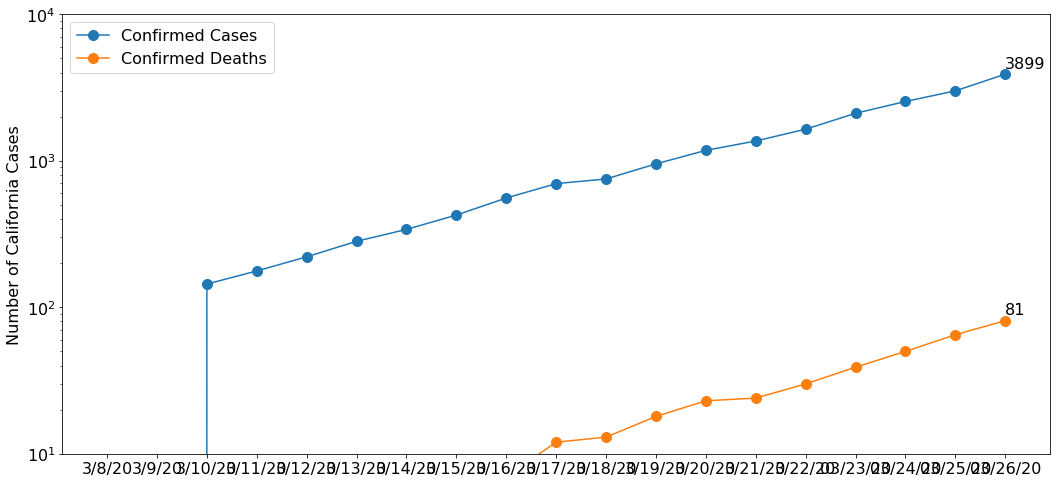

In [87]:
plt.figure(figsize=(15,7))
plt.semilogy(ca.index[50:],ca.iloc[50:],'o-',label='Confirmed Cases',ms=10)
#plt.semilogy(ca.index[50:],ca.iloc[50:],'o',color='C0',ms=10)
#plt.semilogy(ca_deaths.index[50:],ca_deaths.iloc[50:],color='C1')
#label the most recent case
plt.text(ca.index[-1],ca.iloc[-1]*1.1,str(ca.iloc[-1,0]))
plt.semilogy(ca_deaths.index[50:],ca_deaths.iloc[50:],'o-',color='C1',ms=10,label='Confirmed Deaths')
plt.text(ca_deaths.index[-1],ca_deaths.iloc[-1,0]*1.1,str(ca_deaths.iloc[-1,0]))
plt.ylabel('Number of California Cases')
plt.ylim(10,10000)
plt.legend(loc=2)
plt.tight_layout()

In [7]:
df = pd.read_html('http://www.publichealth.lacounty.gov/media/Coronavirus/locations.htm')

In [13]:
la_county = df[0]

In [14]:
la_county['Locations']

0            Laboratory Confirmed Cases (LCC)
1     - Los Angeles County (excl. LB and Pas)
2                                - Long Beach
3                                  - Pasadena
4                                         NaN
                       ...                   
80                                Westchester
81                                   Westwood
82                                   Whittier
83                             Woodland Hills
84                        Under Investigation
Name: Locations, Length: 85, dtype: object